The Information Theoretic based privacy risk (ITPR) metric is defined by the below formula

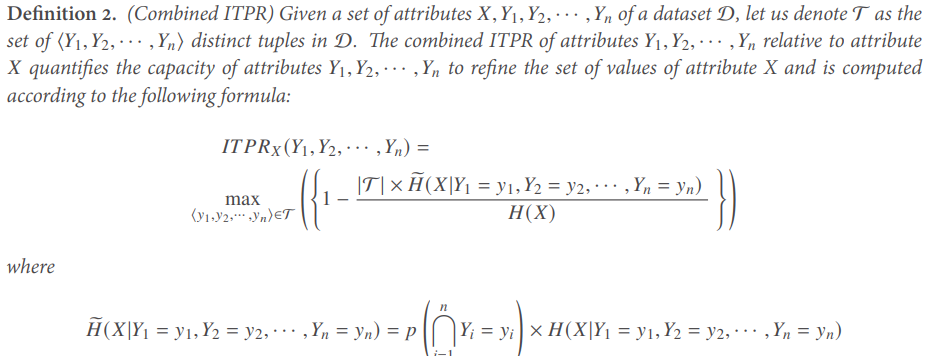



**Entropy H(X)**

In [ ]:
from collections import Counter
import math

def entropy(data):
    """Calculate the entropy of a list of values."""
    entropy_val = 0
    total_count = len(data)
    counts = Counter(data)
    print(counts)
    for value in counts.values():
        probability = value / total_count
        entropy_val -= probability * math.log2(probability)
    return entropy_val


In [ ]:
import pandas as pd
from collections import Counter

def count_unique_tuples(df):

    # Combine values from multiple columns into tuples
    df_copy=df.copy()
    df_copy['combined'] = df.apply(tuple, axis=1)

    # Use Counter on the 'combined' column
    counts = Counter(df_copy['combined'])

    return counts


**P(Y=y1,Y2=y2,...,Yn=yn)**

In [ ]:
def calculate_probability_by_index(counts, index): #index of the tuple value in counter

    # Retrieve the tuple values corresponding to the index
    tuple_values = list(counts.keys())[index]

    # Retrieve the count of the specified tuple from the Counter
    tuple_count = counts[tuple_values]

    # Calculate the total count of all unique tuples
    total_count = sum(counts.values())

    # Calculate the probability
    probability = tuple_count / total_count

    return probability


**H(X=x/Y1=y1,Y2=y2,...,Yn=yn)= -Σ P(X=x/Y1=y1,Y2=y2,...,Yn=yn) log P(X=x/Y1=y1,Y2=y2,...,Yn=yn)**


We suppose that X et Y1 inter Y2 ... inter Yn are independant

**P(X=x/Y1=y1,Y2=y2,...,Yn=yn)=P(X=x,Y1=y1,...Yn=yn)/P(Y1=y1,...,Yn=yn)**

**INFORMATION THEORETIC-BASED PRIVACY RISK METRIC**

In [ ]:
import math
def ITPR_X(df1):
  maximum=0
  X = df1.iloc[:, 0]
  df = df1.iloc[:, 1:]
  H_X = entropy(X)
  counts_with_X=count_unique_tuples(df1)
  counts_Y=count_unique_tuples(df)
  card_gamma = len(counts_Y)
  for index, key in enumerate(counts_Y):
    P_Yi= calculate_probability_by_index(counts_Y,index)
    somme = 0
    for index_X, key_X in enumerate(counts_with_X):
        if key_X[1:] == key:
          P_X_inter_les_Yi = calculate_probability_by_index(counts_with_X,index_X)
          prob = P_X_inter_les_Yi / P_Yi
          log2_prob = math.log2(prob)
          somme -= prob * log2_prob
    H_tilde = somme * P_Yi
    result = 1 - (card_gamma * H_tilde / H_X)
    if result > maximum:
      maximum = result
  return maximum


Example:
We will use the same example from the paper for verification (cases 1 through 6)


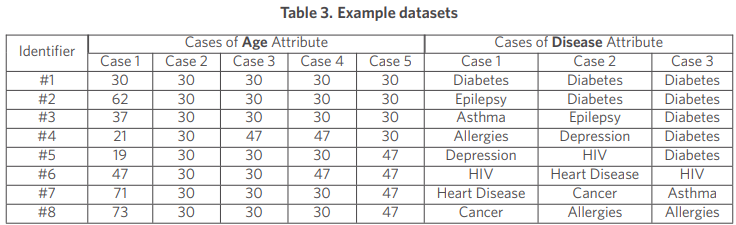

In [ ]:
data = {
    'ID': list(range(1, 9)),
    'Age': [30, 62, 37, 21, 19, 47, 71, 73]
}

case1 = pd.DataFrame(data)

print(case1)

   ID  Age
0   1   30
1   2   62
2   3   37
3   4   21
4   5   19
5   6   47
6   7   71
7   8   73


In [ ]:
ITPR_X(case1)

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})


1.0

In [ ]:
data2 = {
    'ID': list(range(1, 9)),
    'Age': [30, 30, 30, 30, 30, 30, 30, 30]
}

case2 = pd.DataFrame(data2)

print(case2)

   ID  Age
0   1   30
1   2   30
2   3   30
3   4   30
4   5   30
5   6   30
6   7   30
7   8   30


In [ ]:
ITPR_X(case2)

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})


0

In [ ]:
data3 = {
    'ID': list(range(1, 9)),
    'Age': [30, 30, 30, 47, 30, 30, 30, 30]
}

case3 = pd.DataFrame(data3)

print(case3)

   ID  Age
0   1   30
1   2   30
2   3   30
3   4   47
4   5   30
5   6   30
6   7   30
7   8   30


In [ ]:
ITPR_X(case3)

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})


1.0

In [ ]:
data4 = {
    'ID': list(range(1, 9)),
    'Age': [30, 30, 30, 47, 30, 47, 30, 30]
}

case4 = pd.DataFrame(data4)

print(case4)

   ID  Age
0   1   30
1   2   30
2   3   30
3   4   47
4   5   30
5   6   47
6   7   30
7   8   30


In [ ]:
ITPR_X(case4)

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})


0.8333333333333334

In [ ]:
data5 = {
    'ID': list(range(1, 9)),
    'Age': [30, 30, 30, 30, 47, 47, 47, 47]
}

case5 = pd.DataFrame(data5)

print(case5)

   ID  Age
0   1   30
1   2   30
2   3   30
3   4   30
4   5   47
5   6   47
6   7   47
7   8   47


In [ ]:
ITPR_X(case5)

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})


0.33333333333333337

In [ ]:
data6 = {
    'ID': list(range(1, 9)),
    'Age': [30, 30, 30, 30, 30, 30, 30, 30],
    'Zip Code': [35000, 35000, 35000, 35510, 35510, 35510, 35510, 35510]
}

case6 = pd.DataFrame(data6)

print(case6)

   ID  Age  Zip Code
0   1   30     35000
1   2   30     35000
2   3   30     35000
3   4   30     35510
4   5   30     35510
5   6   30     35510
6   7   30     35510
7   8   30     35510


In [ ]:
ITPR_X(case6)

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})


0.603759374819711

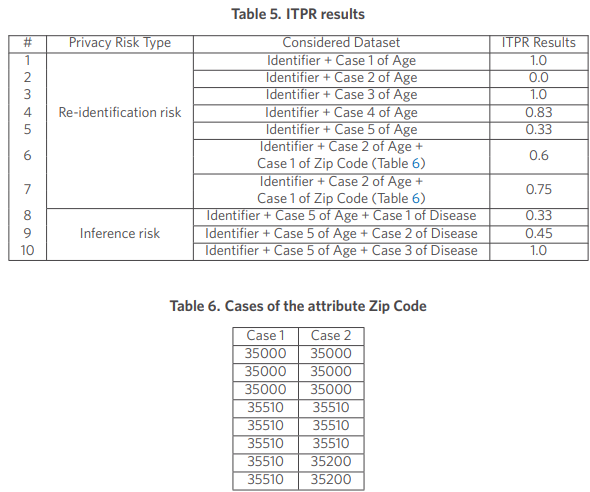


We obtain the same results as in the paper